In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(12)

# Generate Data

In [3]:

sep_list = np.arange(0.2, 5.01, 0.2)
iter_list = []
for sep in sep_list:
    rad = 10
    thk = 5

    N_class = 1000


    def get_half(center_x=0, center_y=0, rad=10, thk=5):
        R_data = np.random.rand(N_class) * thk + rad
        Theta_data = np.random.rand(N_class) * np.pi

        X = center_x + R_data * np.cos(Theta_data)
        Y = center_y + R_data * np.sin(Theta_data)
        return X, Y

    # top half
    X_p, Y_p = get_half(0, 0)
    Y_p = Y_p + sep / 2

    # bottom half
    X_n, Y_n = get_half(12.5, 0)
    Y_n = -Y_n - sep / 2

    XY_p = np.stack((X_p, Y_p), axis=1)
    XY_n = np.stack((X_n, Y_n), axis=1)

    Data = np.concatenate((XY_p, XY_n), axis=0)

    # augment with 1 in the beginning
    Data_aug = np.concatenate((np.ones(len(Data)).reshape(-1, 1), Data), axis=1)
    Label = np.concatenate((np.ones(N_class), -np.ones(N_class)))

    # PLA algorithm

    w = np.zeros(3)  # initial weight

    iteration = 0
    while True:
        h = (np.dot(Data_aug, w) > 0) * 2 - 1

        # get misclassified data
        misclassified_index = (h != Label).nonzero()[0]

        if len(misclassified_index) == 0:
            # PLA terminate
            break

        # randomly pick one
        index_rand = np.random.choice(misclassified_index)

        # update w
        w = w + Label[index_rand] * Data_aug[index_rand]

        iteration += 1
    iter_list.append(iteration)


Text(0, 0.5, 'Iteration')

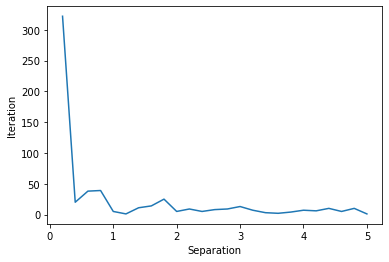

In [4]:
plt.plot(sep_list, iter_list)
plt.xlabel('Separation')
plt.ylabel('Iteration')